['10.jpeg', '11.jpeg', '6.jpeg', '4.jpeg', '5.jpeg', '9.jpeg', '3.jpeg']
 Camera matrix:
[[1.27495384e+03 0.00000000e+00 9.47363988e+02]
 [0.00000000e+00 1.39745089e+03 3.49474561e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]

 Distortion coefficient:
[[-6.53332751e-01  4.09710558e+00  5.41429493e-03 -4.29411071e-02
  -1.26140270e+01]]

 Rotation Vectors:
(array([[ 0.20543622],
       [-0.39625697],
       [ 1.46217216]]),)

 Translation Vectors:
(array([[-0.68354906],
       [-0.75094561],
       [18.11311337]]),)


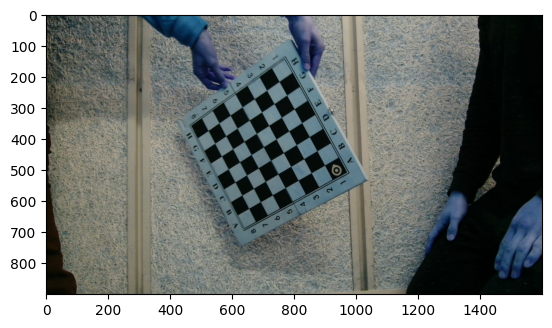

In [1]:
# Import required modules
import cv2
import numpy as np
import os
import glob
import matplotlib.pyplot as plt


# Define the dimensions of checkerboard
CHECKERBOARD = (6, 6)


# stop the iteration when specified
# accuracy, epsilon, is reached or
# specified number of iterations are completed.
criteria = (cv2.TERM_CRITERIA_EPS +
			cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)


# Vector for 3D points
threedpoints = []

# Vector for 2D points
twodpoints = []


# 3D points real world coordinates
objectp3d = np.zeros((1, CHECKERBOARD[0]
					* CHECKERBOARD[1],
					3), np.float32)
objectp3d[0, :, :2] = np.mgrid[0:CHECKERBOARD[0],
							0:CHECKERBOARD[1]].T.reshape(-1, 2)
prev_img_shape = None


# Extracting path of individual image stored
# in a given directory. Since no path is
# specified, it will take current directory
# jpg files alone
images = glob.glob('*.jpeg')
print(images)

for filename in images:
	image = cv2.imread(filename)
	grayColor = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

	# Find the chess board corners
	# If desired number of corners are
	# found in the image then ret = true
	ret, corners = cv2.findChessboardCorners(
					grayColor, CHECKERBOARD,
					cv2.CALIB_CB_ADAPTIVE_THRESH
					+ cv2.CALIB_CB_FAST_CHECK +
					cv2.CALIB_CB_NORMALIZE_IMAGE)

	# If desired number of corners can be detected then,
	# refine the pixel coordinates and display
	# them on the images of checker board
	if ret == True:
		threedpoints.append(objectp3d)

		# Refining pixel coordinates
		# for given 2d points.
		corners2 = cv2.cornerSubPix(
			grayColor, corners, (11, 11), (-1, -1), criteria)

		twodpoints.append(corners2)

		# Draw and display the corners
		image = cv2.drawChessboardCorners(image,
										CHECKERBOARD,
										corners2, ret)

	plt.imshow(image)

h, w = image.shape[:2]


# Perform camera calibration by
# passing the value of above found out 3D points (threedpoints)
# and its corresponding pixel coordinates of the
# detected corners (twodpoints)
ret, matrix, distortion, r_vecs, t_vecs = cv2.calibrateCamera(
	threedpoints, twodpoints, grayColor.shape[::-1], None, None)


# Displaying required output
print(" Camera matrix:")
print(matrix)

print("\n Distortion coefficient:")
print(distortion)

print("\n Rotation Vectors:")
print(r_vecs)

print("\n Translation Vectors:")
print(t_vecs)
